# DETECTING THE PRESENCE OF KYPHOSIS USING VARIOUS SCIKIT-LEARN AND AWS SAGEMAKER ML MODELS

#### IMPORT LIBRARIES AND DATASETS


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [5]:
Kyphosis_df = pd.read_csv("kyphosis.csv")
Kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


#### Data Glossary

- Kyphosis (present or absent)
- Age (in months)
- Number of vertebrae involved
- Number of the top-most vertebrae operated on

In [6]:
Kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [7]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [8]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [9]:
Kyphosis_df['Age'].mean()/12

6.97119341563786

In [10]:
Kyphosis_df['Age'].max()/12

17.166666666666668

In [11]:
Kyphosis_df['Age'].min()/12

0.08333333333333333

#### PERFORM DATA VISUALIZATION

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [14]:
Kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [15]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [16]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

#### Detect presence of disease in dataset.

In [19]:
Kyphosis_df['Kyphosis'].value_counts(normalize=True) 

Kyphosis
0    0.790123
1    0.209877
Name: proportion, dtype: float64

In [22]:
Kyphosis_df.corr()

,Kyphosis,Age,Number,Start
Kyphosis,1.000000,0.126465,0.360935,-0.445943
Age,0.126465,1.000000,-0.016687,0.057828
Number,0.360935,-0.016687,1.000000,-0.425099
Start,-0.445943,0.057828,-0.425099,1.000000


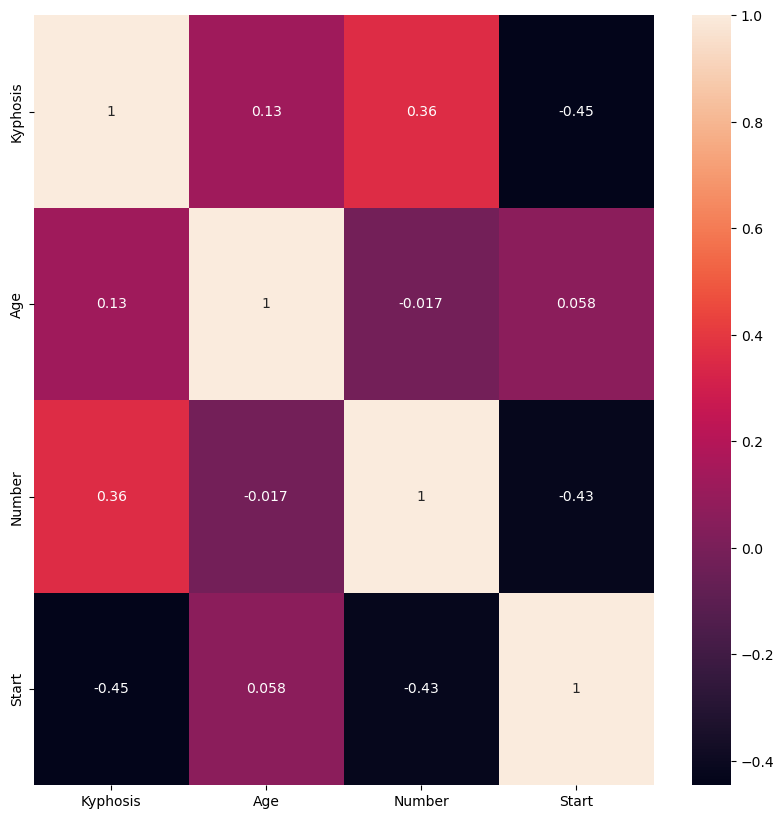

In [23]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(), annot=True) 
plt.show()

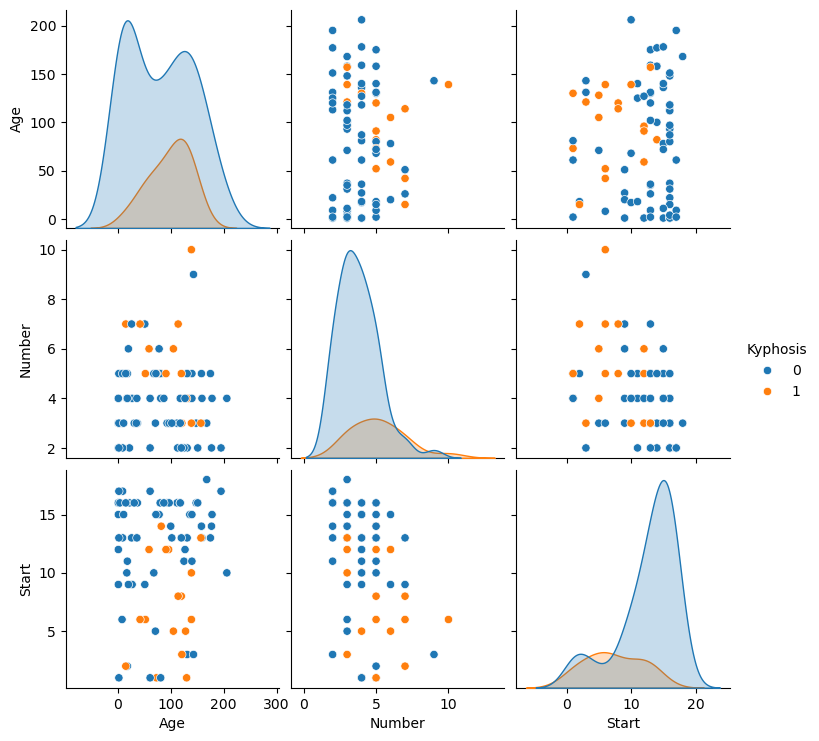

In [25]:
sns.pairplot(Kyphosis_df, hue='Kyphosis', vars = ['Age', 'Number', 'Start']);
plt.show()

#### Plot the data countplot showing how many samples belong to each class

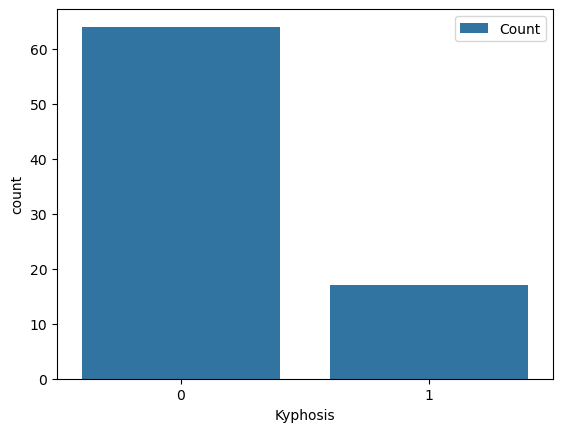

In [26]:
sns.countplot(x = Kyphosis_df['Kyphosis'], label = 'Count')
plt.show()

#### CREATE TESTING AND TRAINING DATASETS / DATA CLEANING

In [27]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'],axis=1)
y = Kyphosis_df['Kyphosis']

In [28]:
X,y

(    Age  Number  Start
 0    71       3      5
 1   158       3     14
 2   128       4      5
 3     2       5      1
 4     1       4     15
 ..  ...     ...    ...
 76  157       3     13
 77   26       7     13
 78  120       2     13
 79   42       7      6
 80   36       4     13
 
 [81 rows x 3 columns],
 0     0
 1     0
 2     1
 3     0
 4     0
      ..
 76    1
 77    0
 78    0
 79    1
 80    0
 Name: Kyphosis, Length: 81, dtype: int64)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


#### TRAIN A KNN MODEL IN SCIKIT-LEARN

In [30]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [31]:
X_train.shape

(60, 3)

In [32]:
y_train.shape

(60,)

In [33]:
X_test.shape

(21, 3)

In [34]:
y_test.shape

(21,)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### EVALUATE TRAINED KNN MODEL PERFORMANCE IN SCIKIT-LEARN

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

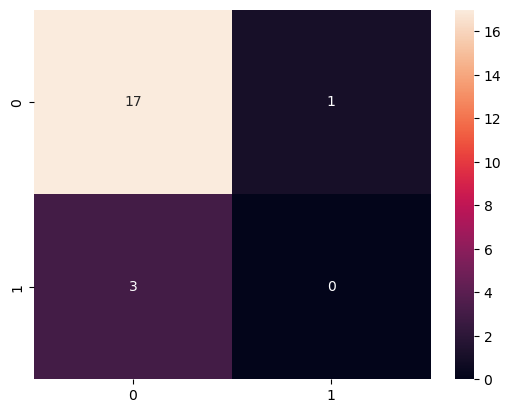

In [38]:
# Predicting the Test set results
y_predict_test = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)
plt.show()

In [39]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.00      0.00      0.00         3

    accuracy                           0.81        21
   macro avg       0.42      0.47      0.45        21
weighted avg       0.73      0.81      0.77        21



#### TRAIN A KNN MODEL IN AWS SAGEMAKER

In [71]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'],axis = 1)
y = Kyphosis_df['Kyphosis']

In [72]:
X = np.array(X)
y = np.array(y)

In [73]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [74]:
X_train.shape

(56, 3)

In [75]:
X_test.shape

(25, 3)

In [45]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [46]:
train_data

,Target,0,1,2
0,0,2,2,17
1,0,151,2,16
2,1,73,5,1
3,0,4,3,16
4,0,158,5,14
5,0,18,5,2
6,0,93,3,16
7,0,120,2,13
8,0,37,3,16
9,0,175,5,13


In [47]:
train_data.shape

(56, 4)

In [48]:
# save train_data and validation_data as csv files.
train_data.to_csv('train.csv', header = False, index = False)


In [49]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

#S3 bucket and prefix that we want to use
# default_bucket - creates a Amazon S3 bucket to be used in this session
bucket = 'woodzee-data-science-projects'                   # Set a default S3 bucket
prefix = 'KNN-classifier'
key = 'KNN-classifier'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[02/08/25 00:58:11] INFO     Found credentials from IAM Role:                                   ]8;id=377625;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=957030;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


[02/08/25 00:58:14] INFO     Found credentials from IAM Role:                                   ]8;id=160514;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=548116;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

[02/08/25 00:58:15] INFO     Found credentials from IAM Role:                                   ]8;id=282119;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=10857;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [50]:
print(role)

arn:aws:iam::970547371282:role/service-role/AmazonSageMaker-ExecutionRole-20250202T133633


In [51]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

[02/08/25 00:58:33] INFO     Found credentials from IAM Role:                                   ]8;id=94652;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=986726;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

uploaded training data location: s3://woodzee-data-science-projects/KNN-classifier/train/KNN-classifier


In [52]:
# create output placeholder in S3 bucket to store the output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://woodzee-data-science-projects/KNN-classifier/output


In [53]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session



# Note that this code leverages the new SageMaker SDK 2.0
# Check this for the list of changes from AWS SageMaker SDK 1.0 to 2.0: https://sagemaker.readthedocs.io/en/stable/v2.html

# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri

# container = sagemaker.image_uris.retrieve("xgboost", region = 'us-east-1')
container = sagemaker.image_uris.retrieve("knn", boto3.Session().region_name)

# container = get_image_uri(boto3.Session().region_name, 'knn','1.0-1') # Latest version of XGboost

[02/08/25 00:58:54] INFO     Same images used for training and inference. Defaulting to image     ]8;id=729812;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=972739;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#391\391]8;;\
                             scope: inference.                                                                     

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=389643;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=348002;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

In [54]:
X_train

array([[  2,   2,  17],
       [151,   2,  16],
       [ 73,   5,   1],
       [  4,   3,  16],
       [158,   5,  14],
       [ 18,   5,   2],
       [ 93,   3,  16],
       [120,   2,  13],
       [ 37,   3,  16],
       [175,   5,  13],
       [158,   3,  14],
       [ 27,   4,   9],
       [  1,   4,  15],
       [ 81,   4,   1],
       [ 26,   7,  13],
       [114,   7,   8],
       [121,   3,   3],
       [195,   2,  17],
       [ 59,   6,  12],
       [ 61,   2,  17],
       [ 31,   3,  16],
       [ 36,   4,  13],
       [120,   5,   8],
       [ 15,   5,  16],
       [ 20,   6,   9],
       [118,   3,  16],
       [ 51,   7,   9],
       [178,   4,  15],
       [159,   4,  13],
       [131,   5,  13],
       [  1,   2,  16],
       [118,   4,  16],
       [128,   4,   5],
       [140,   5,  11],
       [206,   4,  10],
       [140,   4,  15],
       [  2,   3,  13],
       [ 61,   4,   1],
       [127,   4,  12],
       [136,   4,  15],
       [ 15,   7,   2],
       [ 96,   3

In [76]:
X_test

array([[120,   2,  13],
       [139,   3,  10],
       [151,   2,  16],
       [131,   2,   3],
       [ 73,   5,   1],
       [125,   2,  11],
       [131,   5,  13],
       [  9,   5,  13],
       [143,   9,   3],
       [140,   4,  15],
       [158,   5,  14],
       [157,   3,  13],
       [ 18,   4,  11],
       [ 35,   3,  13],
       [178,   4,  15],
       [ 20,   6,   9],
       [  1,   2,  16],
       [206,   4,  10],
       [159,   4,  13],
       [ 51,   7,   9],
       [ 91,   5,  12],
       [177,   2,  14],
       [  8,   3,   6],
       [ 71,   3,   5],
       [  2,   2,  17]])

In [56]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.



knn_classifier = sagemaker.estimator.Estimator(container,
                                               role, 
                                               instance_count = 1, 
                                               instance_type = 'ml.m4.xlarge',
                                               output_path = output_location,
                                               sagemaker_session = sagemaker_session)

# To improve the performance of the model, a hyperparameters tuning job need to be run 

hyperparams = {"k": 5, "predictor_type": "classifier", "sample_size":64}

knn_classifier.set_hyperparameters(**hyperparams)

[02/08/25 00:59:27] INFO     Found credentials from IAM Role:                                   ]8;id=816619;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=558731;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [57]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type = 'text/csv',s3_data_type = 'S3Prefix')

data_channels = {'train': train_input}

knn_classifier.fit(data_channels)

[02/08/25 00:59:43] INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=840409;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=857364;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#90\90]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Creating training-job with name: knn-2025-02-08-00-59-43-444           ]8;id=981710;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=297503;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\

2025-02-08 00:59:43 Starting - Starting the training job...
..25-02-08 01:00:10 Starting - Preparing the instances for training.
..25-02-08 01:00:42 Downloading - Downloading input data.
.................07 Downloading - Downloading the training image.
.Docker entrypoint called with argument(s): trainpleted. Training in progress..
Running default environment configuration script
[02/08/2025 01:04:31 INFO 140348016334656] Reading default configuration from /opt/amazon/lib/python3.9/site-packages/algorithm/resources/default-conf.json: {'_kvstore': 'dist_async', '_log_level': 'info', '_num_gpus': 'auto', '_num_kv_servers': '1', '_tuning_objective_metric': '', '_faiss_index_nprobe': '5', 'epochs': '1', 'feature_dim': 'auto', 'faiss_index_ivf_nlists': 'auto', 'index_metric': 'L2', 'index_type': 'faiss.Flat', 'mini_batch_size': '5000', '_enable_profiler': 'false'}
[02/08/2025 01:04:31 INFO 140348016334656] Merging with provided configuration from /opt/ml/input/config/hyperparameters.json: {'

#### DEPLOY MODEL TO ENDPOINT TO GENERATE INFERENCES

In [58]:
# Deploy the model to perform inference 
# For CSV training, the algorithm assumes that the target variable is in the first column and that the CSV does not have a header record.
# For CSV inference, the algorithm assumes that CSV input does not have the label column.

knn_predictor = knn_classifier.deploy(initial_instance_count = 1, 
                                      instance_type = 'ml.m4.xlarge',
                                      endpoint_name='knn-analysis')



[02/08/25 01:06:33] INFO     Creating model with name: knn-2025-02-08-01-06-33-614                  ]8;id=52437;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=264852;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[02/08/25 01:06:34] INFO     Creating endpoint-config with name knn-analysis                        ]8;id=526325;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=278858;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\

                    INFO     Creating endpoint with name knn-analysis                               ]8;id=521596;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=960057;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

-----------!

In [77]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''

from sagemaker.serializers import CSVSerializer, JSONSerializer
from sagemaker.deserializers import JSONDeserializer
from sagemaker.predictor import Predictor

knn_predictor.serializer = CSVSerializer()
knn_predictor.deserializer = JSONDeserializer()

In [78]:
X_test 

array([[120,   2,  13],
       [139,   3,  10],
       [151,   2,  16],
       [131,   2,   3],
       [ 73,   5,   1],
       [125,   2,  11],
       [131,   5,  13],
       [  9,   5,  13],
       [143,   9,   3],
       [140,   4,  15],
       [158,   5,  14],
       [157,   3,  13],
       [ 18,   4,  11],
       [ 35,   3,  13],
       [178,   4,  15],
       [ 20,   6,   9],
       [  1,   2,  16],
       [206,   4,  10],
       [159,   4,  13],
       [ 51,   7,   9],
       [ 91,   5,  12],
       [177,   2,  14],
       [  8,   3,   6],
       [ 71,   3,   5],
       [  2,   2,  17]])

In [79]:
result = knn_predictor.predict(X_test)


In [80]:
result

{'predictions': [{'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0}]}

In [81]:
y_predict = np.array([result['predictions'][i]['predicted_label'] for i in range(len(result['predictions']))])

In [82]:
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

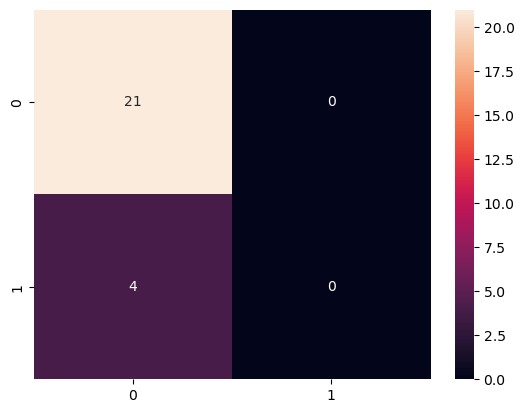

In [85]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure()
sns.heatmap(cm, annot=True, fmt = 'd')
plt.show()

In [86]:
# plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, y_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict)))

Precision = 0.42
Recall = 0.5
Accuracy = 0.84


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [87]:
# Delete the end-point
knn_predictor.delete_endpoint()

[02/08/25 01:25:20] INFO     Deleting endpoint configuration with name: knn-analysis                ]8;id=908486;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=961225;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4865\4865]8;;\

[02/08/25 01:25:21] INFO     Deleting endpoint with name: knn-analysis                              ]8;id=158919;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=518608;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4855\4855]8;;\

Using the same dataset, perform the following tasks:
- Train a random forest classifier model in SKLearn and assess its performance
- Plot the confusion matrix
- Print the classification Report
- Train a decision tree classifier model in SKLearn and assess its performance
- Plot the confusion matrix
- Print the classification Report
- Calculate Feature Importance
- Train an XG-Boost Algorithm in SageMaker
- Comment on the results


Using the same dataset, perform the following tasks:
- Train a random forest classifier model in SKLearn and assess its performance
- Plot the confusion matrix
- Print the classification Report
- Train a decision tree classifier model in SKLearn and assess its performance
- Plot the confusion matrix
- Print the classification Report
- Calculate Feature Importance
- Train an XG-Boost Algorithm in SageMaker
- Comment on the results


In [88]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

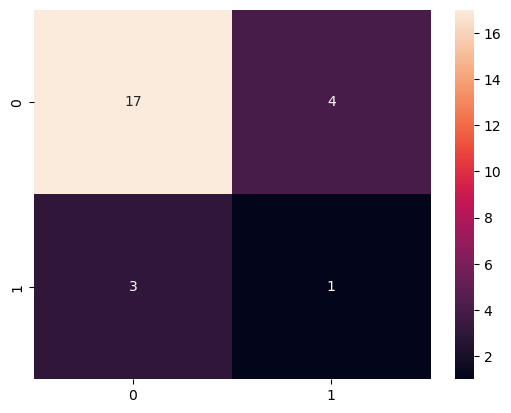

In [89]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
plt.show()

In [90]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.20      0.25      0.22         4

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.75      0.72      0.73        25



In [91]:
labels = ['Age', 'Number', 'Start']

In [92]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = labels,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.691115
Age       0.255456
Number    0.053429


              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.00      0.00      0.00         4

    accuracy                           0.72        25
   macro avg       0.41      0.43      0.42        25
weighted avg       0.69      0.72      0.70        25



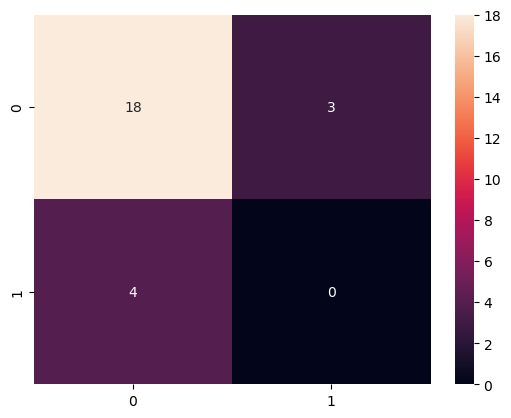

In [93]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

In [94]:
from sagemaker.amazon.amazon_estimator import get_image_uri

# container = sagemaker.image_uris.retrieve("xgboost", region = 'us-east-1')
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')

# container = get_image_uri(boto3.Session().region_name, 'xgboost','1.0-1') # Latest version of XGboost

[02/08/25 01:35:07] INFO     Defaulting to only available Python version: py3                     ]8;id=67349;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=370082;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#608\608]8;;\

                    INFO     Defaulting to only supported image scope: cpu.                       ]8;id=347298;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=605034;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#532\532]8;;\

In [95]:
Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                                   role, 
                                                   instance_count = 1, 
                                                   instance_type = 'ml.m4.xlarge',
                                                   output_path = output_location,
                                                   sagemaker_session = sagemaker_session)

# To improve the performance of the model, a hyperparameters tuning job need to be run 
Xgboost_classifier.set_hyperparameters(max_depth = 20,
                                       objective = 'multi:softmax',
                                       num_class = 2,
                                       eta = 0.1,
                                       num_round = 150)


In [96]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')

data_channels = {'train': train_input}

Xgboost_classifier.fit(data_channels)

[02/08/25 01:35:25] INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=83621;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=155658;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#90\90]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Creating training-job with name:                                       ]8;id=300904;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=623126;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\
                             sagemaker-xgboost-2025-02-08-01-35-25-647                                             

2025-02-08 01:35:27 Starting - Starting the training job...
..25-02-08 01:35:41 Starting - Preparing the instances for training.
..25-02-08 01:36:07 Downloading - Downloading input data.
..25-02-08 01:36:32 Downloading - Downloading the training image.
.[2025-02-08 01:37:38.924 ip-10-2-241-249.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Single node training.
[01:37:38] 56x3 matrix with 168 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2025-02-08 01:37:39.00

In [97]:
# Deploy the model to perform inference 
# For CSV training, the algorithm assumes that the target variable is in the first column and that the CSV does not have a header record.
# For CSV inference, the algorithm assumes that CSV input does not have the label column.

xgb_predictor = Xgboost_classifier.deploy(initial_instance_count = 1, 
                                          instance_type = 'ml.m4.xlarge', 
                                          endpoint_name='xgboost')

[02/08/25 01:38:27] INFO     Creating model with name: sagemaker-xgboost-2025-02-08-01-38-27-845    ]8;id=562982;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=566694;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[02/08/25 01:38:28] INFO     Creating endpoint-config with name xgboost                             ]8;id=544238;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=101062;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\

                    INFO     Creating endpoint with name xgboost                                    ]8;id=621406;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=819635;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

------!

In [98]:
xgb_predictor.serializer = CSVSerializer()
# xgb_predictor.deserializer = json_deserializer

In [99]:
X_test

array([[120,   2,  13],
       [139,   3,  10],
       [151,   2,  16],
       [131,   2,   3],
       [ 73,   5,   1],
       [125,   2,  11],
       [131,   5,  13],
       [  9,   5,  13],
       [143,   9,   3],
       [140,   4,  15],
       [158,   5,  14],
       [157,   3,  13],
       [ 18,   4,  11],
       [ 35,   3,  13],
       [178,   4,  15],
       [ 20,   6,   9],
       [  1,   2,  16],
       [206,   4,  10],
       [159,   4,  13],
       [ 51,   7,   9],
       [ 91,   5,  12],
       [177,   2,  14],
       [  8,   3,   6],
       [ 71,   3,   5],
       [  2,   2,  17]])

In [100]:
result = xgb_predictor.predict(X_test)
result

b'0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0'

In [102]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    #makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    #Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    #iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    #converting the list to into array
    l = np.array(l).astype('float32')
    
    #reshape one-dimensional array to two-dimentaional array
    return l.reshape(-1,1)

In [103]:
y_predict = bytes_2_array(result)

In [104]:
y_predict

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

<Axes: >

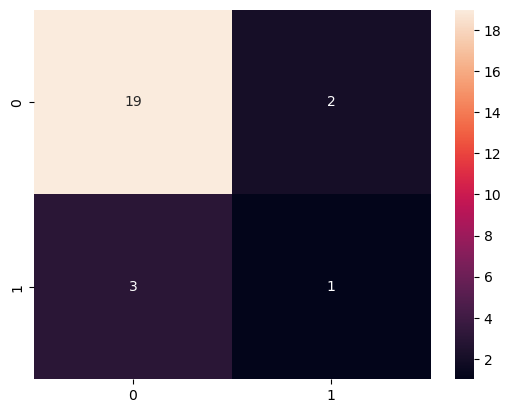

In [105]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure()
sns.heatmap(cm, annot=True, fmt = 'd')

In [106]:
# plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, y_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict)))

Precision = 0.5984848484848485
Recall = 0.5773809523809523
Accuracy = 0.8


In [107]:
# Delete the end-point
xgb_predictor.delete_endpoint()

[02/08/25 01:47:14] INFO     Deleting endpoint configuration with name: xgboost                     ]8;id=596045;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=166092;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4865\4865]8;;\

                    INFO     Deleting endpoint with name: xgboost                                   ]8;id=432196;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=761014;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4855\4855]8;;\

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [ ]:
Kyphosis_df.describe()

In [ ]:
Kyphosis_df['Age'].mean()/12

In [ ]:
Kyphosis_df['Age'].min()/12

In [ ]:
Kyphosis_df['Age'].max()/12

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot the data countplot showing how many samples belong to each class**

In [ ]:
sns.countplot(x = Kyphosis_df['Kyphosis'], label = "Count");